Data loaded successfully!
             Squad  Country  LgRk  MP   W   D   L  GF  GA  GD  Pts  Pts/MP  \
0        Liverpool  eng ENG     1  36  25   8   3  83  37  46   83    2.31   
1          Arsenal  eng ENG     2  36  18  14   4  66  33  33   68    1.89   
2    Newcastle Utd  eng ENG     3  36  20   6  10  68  45  23   66    1.83   
3  Manchester City  eng ENG     4  36  19   8   9  67  43  24   65    1.81   
4          Chelsea  eng ENG     5  36  18   9   9  62  43  19   63    1.75   

     xG   xGA   xGD  xGD/90     Last 5  Attendance      Top Team Scorer  \
0  77.8  34.6  43.2    1.20  W W W L D       60321   Mohamed Salah - 28   
1  57.0  32.3  24.7    0.69  D W D L D       60256      Kai Havertz - 9   
2  61.1  43.7  17.3    0.48  W L W D W       52185  Alexander Isak - 23   
3  63.6  45.3  18.3    0.51  W W W W D       52771  Erling Haaland - 21   
4  65.9  45.8  20.1    0.56  D W W W L       39662     Cole Palmer - 15   

       Goalkeeper  
0         Alisson  
1      David R

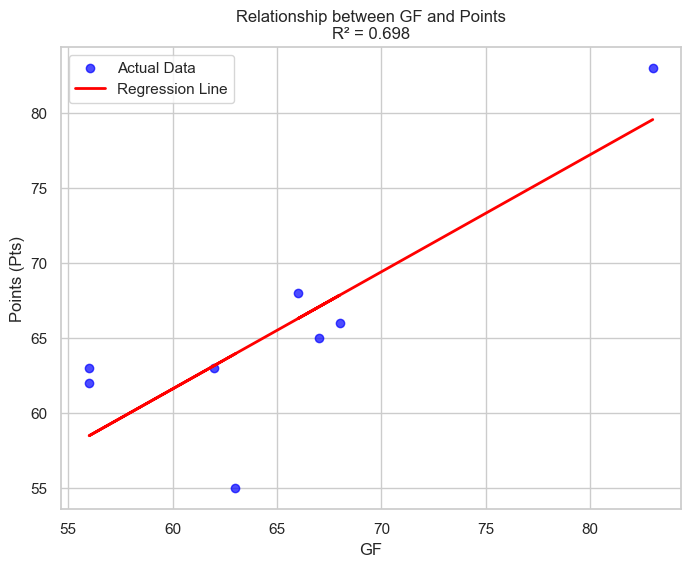

GF: R² = 0.698


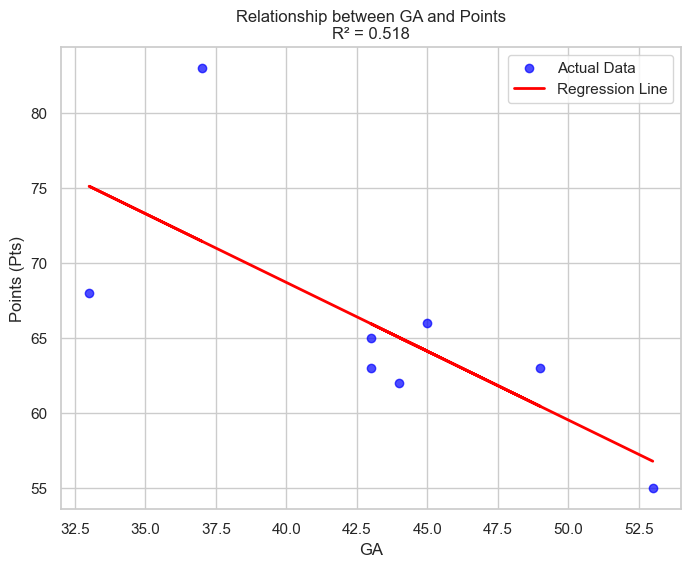

GA: R² = 0.518


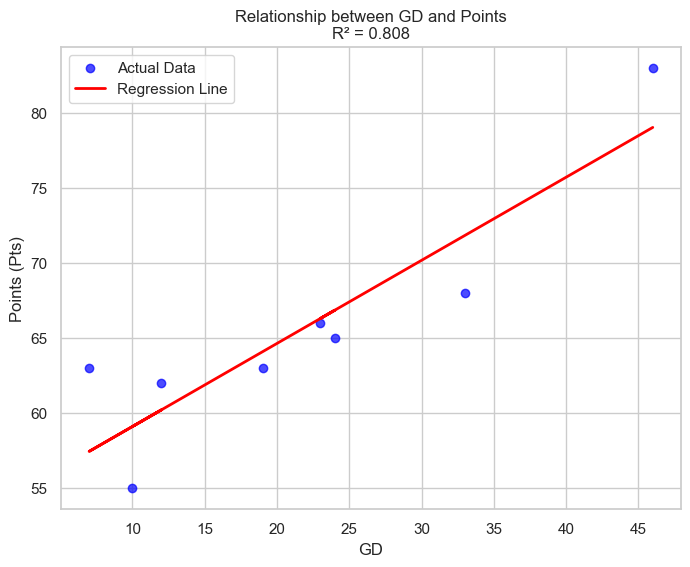

GD: R² = 0.808


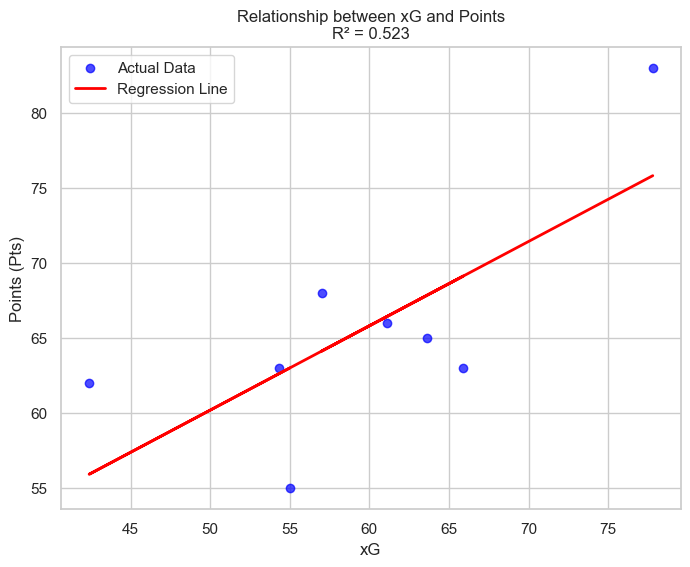

xG: R² = 0.523


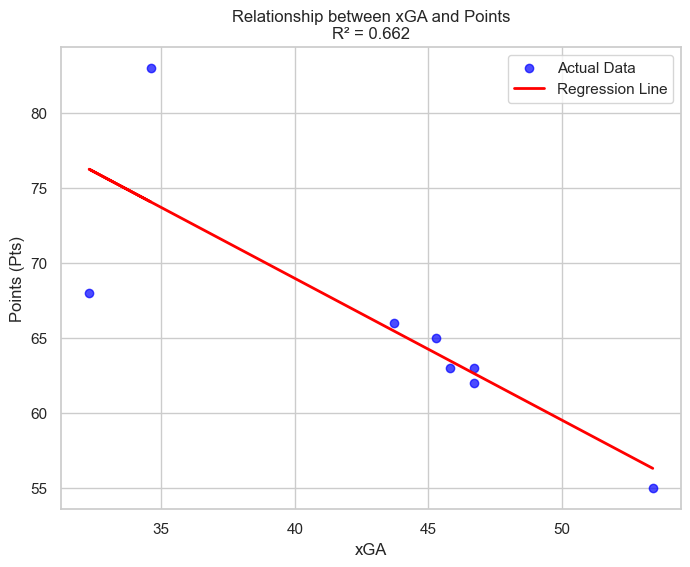

xGA: R² = 0.662


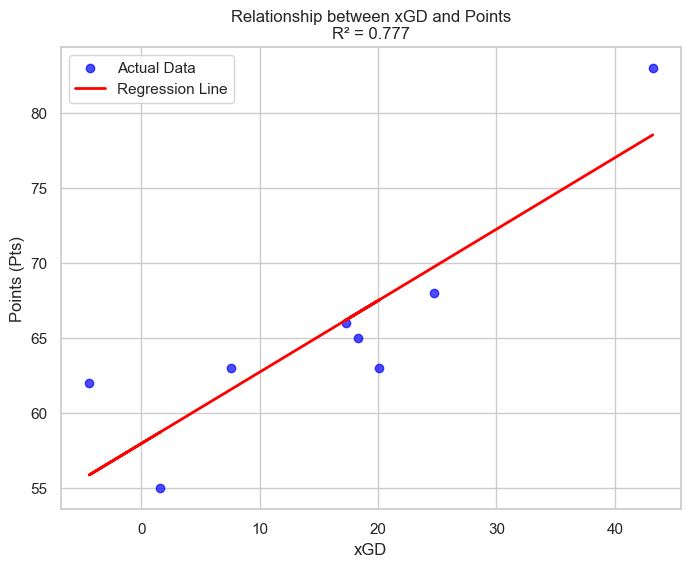

xGD: R² = 0.777


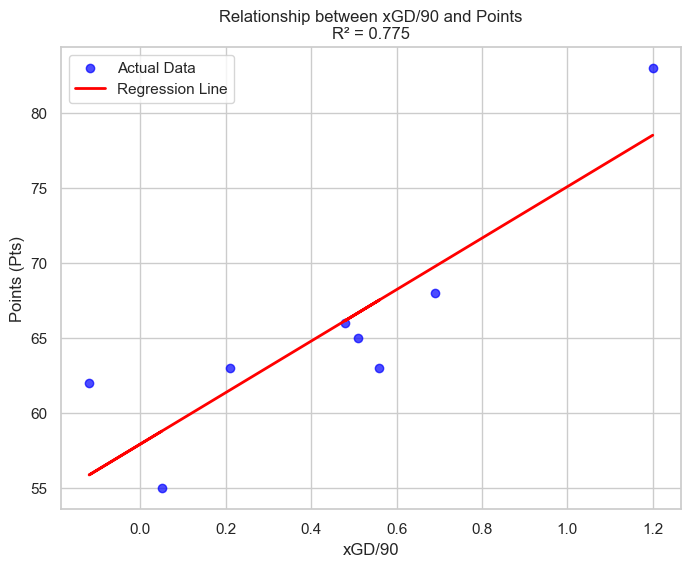

xGD/90: R² = 0.775


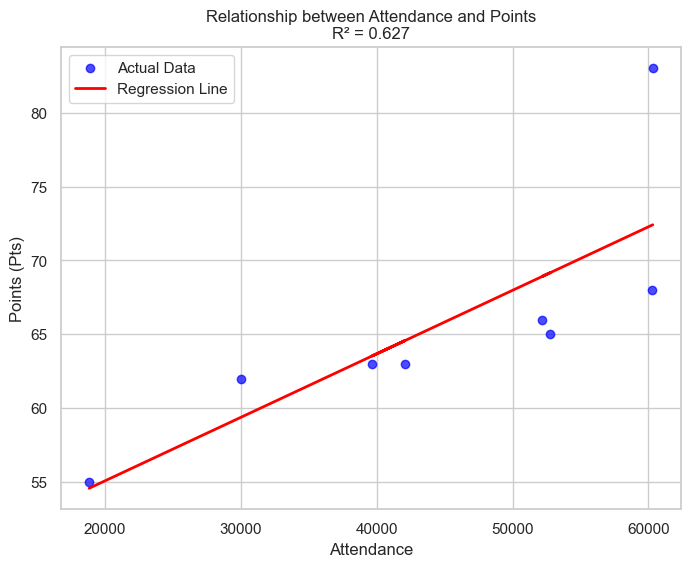

Attendance: R² = 0.627

Features ranked by their correlation with Points:
GD: 0.808
xGD: 0.777
xGD/90: 0.775
GF: 0.698
xGA: 0.662
Attendance: 0.627
xG: 0.523
GA: 0.518

Running multiple regression analysis...

Multiple Regression Coefficients:
      Feature  Coefficient  Absolute_Coefficient
6      xGD/90 -2700.407628           2700.407628
5         xGD   128.779465            128.779465
3          xG   -54.190162             54.190162
4         xGA    53.759009             53.759009
2          GD     0.647463              0.647463
0          GF     0.356671              0.356671
1          GA    -0.290793              0.290793
7  Attendance    -0.000305              0.000305

Overall Model R²: 1.000


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Set up visualization style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Load the data from CSV file
# (Make sure the CSV file is in the same directory as your notebook)
try:
    df = pd.read_csv('premier_league_data.csv')  # Update with your actual filename
    print("Data loaded successfully!")
    print(df.head())
except FileNotFoundError:
    print("Error: File not found. Please ensure:")
    print("1. The CSV file exists in your current working directory")
    print("2. You've specified the correct filename")
    print("3. The file has the correct data format (matching your table)")
except Exception as e:
    print(f"An error occurred while loading the file: {str(e)}")

# 2. Data Cleaning (if needed)
# Ensure column names match exactly what's in your CSV
# If your CSV has different column names, adjust them here:
column_mapping = {
    'GF': 'GF',
    'GA': 'GA',
    'GD': 'GD',
    'Pts': 'Pts',
    'xG': 'xG',
    'xGA': 'xGA',
    'xGD': 'xGD',
    'xGD/90': 'xGD/90',
    'Attendance': 'Attendance'
}

df = df.rename(columns=column_mapping)


# 3. Define function to evaluate each feature's relationship with Points
def evaluate_feature(df, feature, target='Pts'):
    """
    Evaluates the linear relationship between a feature and points.
    Returns R-squared value and shows a regression plot.
    """
    X = df[[feature]].values
    y = df[target].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.7, label='Actual Data')
    plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel(feature)
    plt.ylabel('Points (Pts)')
    plt.title(f'Relationship between {feature} and Points\nR² = {r2:.3f}')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return r2

# 4. Evaluate all features
features_to_evaluate = ['GF', 'GA', 'GD', 'xG', 'xGA', 'xGD', 'xGD/90', 'Attendance']
r2_results = {}

for feature in features_to_evaluate:
    try:
        r2 = evaluate_feature(df, feature)
        r2_results[feature] = r2
        print(f"{feature}: R² = {r2:.3f}")
    except KeyError:
        print(f"Warning: Column '{feature}' not found in dataset. Skipping...")


print("\nFeatures ranked by their correlation with Points:")
sorted_results = sorted(r2_results.items(), key=lambda x: abs(x[1]), reverse=True)
for feature, r2 in sorted_results:
    print(f"{feature}: {r2:.3f}")


print("\nRunning multiple regression analysis...")
try:
    # Select only numeric features that exist in the dataframe
    available_features = [f for f in features_to_evaluate if f in df.columns]
    X = df[available_features]
    y = df['Pts']
    
    model = LinearRegression()
    model.fit(X, y)
    
    # Create a DataFrame with feature coefficients
    coefficients = pd.DataFrame({
        'Feature': available_features,
        'Coefficient': model.coef_,
        'Absolute_Coefficient': np.abs(model.coef_)
    }).sort_values('Absolute_Coefficient', ascending=False)
    
    print("\nMultiple Regression Coefficients:")
    print(coefficients)
    
    # Calculate and print overall model performance
    y_pred = model.predict(X)
    overall_r2 = r2_score(y, y_pred)
    print(f"\nOverall Model R²: {overall_r2:.3f}")
    
except Exception as e:
    print(f"Error in multiple regression: {str(e)}")